In [28]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [30]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [31]:
df = data[data["Visit"] == 1]
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,NaN,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [32]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [33]:
df['SES']= df['SES'].fillna(data['SES'].mean())
    

<ipython-input-33-de35f1517ac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SES']= df['SES'].fillna(data['SES'].mean())


In [34]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [35]:
df=df.drop(['Subject ID', 'MRI ID', 'MR Delay', 'Visit', 'Hand'], axis=1) 
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
5,Nondemented,F,88,18,3.000000,28.0,0.0,1215,0.710,1.444
7,Nondemented,M,80,12,4.000000,28.0,0.0,1689,0.712,1.039
10,Demented,M,71,16,2.460452,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...
359,Demented,M,73,12,2.460452,23.0,0.5,1661,0.698,1.056
361,Nondemented,F,66,13,2.000000,30.0,0.0,1495,0.746,1.174
365,Demented,F,72,16,3.000000,24.0,0.5,1354,0.733,1.296
367,Demented,M,80,16,1.000000,28.0,0.5,1704,0.711,1.030


In [36]:
clean = df.copy()
data_binary_encoded = pd.get_dummies(clean, columns=["M/F"])
data_binary_encoded.head()

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [37]:
data_binary_encoded=data_binary_encoded.rename(columns={'M/F_M':'Male','M/F_F':'Female'})
data_binary_encoded

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1
...,...,...,...,...,...,...,...,...,...,...,...
359,Demented,73,12,2.460452,23.0,0.5,1661,0.698,1.056,0,1
361,Nondemented,66,13,2.000000,30.0,0.0,1495,0.746,1.174,1,0
365,Demented,72,16,3.000000,24.0,0.5,1354,0.733,1.296,1,0
367,Demented,80,16,1.000000,28.0,0.5,1704,0.711,1.030,0,1


In [38]:
# Assign X (data) and y (target = DEMENTED/NOT)

X = data_binary_encoded.drop("Group", axis=1)
y = data_binary_encoded["Group"]
print(X.shape, y.shape)

(150, 10) (150,)


In [39]:
# Split our data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
# LOGISTIC REGRESSION 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [41]:
# Fit (train) or model using the training data

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [42]:
# Validate the model using the test data

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9107142857142857
Testing Data Score: 0.868421052631579


In [43]:
# Make predictions

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Nondemented' 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Demented' 'Nondemented' 'Demented' 'Demented']
First 10 Actual labels: ['Converted', 'Nondemented', 'Converted', 'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented', 'Converted', 'Demented', 'Demented']


In [44]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Nondemented,Converted
1,Nondemented,Nondemented
2,Nondemented,Converted
3,Nondemented,Nondemented
4,Nondemented,Nondemented
5,Nondemented,Nondemented
6,Demented,Nondemented
7,Nondemented,Converted
8,Demented,Demented
9,Demented,Demented


In [45]:
# SVM

target = data_binary_encoded["Group"]
target_names = ["Demented", "Nondemented", "Converted"]

In [46]:
data = data_binary_encoded.drop("Group", axis=1).reset_index(drop=True)
feature_names = data.columns
data.head()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
1,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
2,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
3,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
4,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [48]:
# Support vector machine linear classifier

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
# Model Accuracy

print('Test Accuracy: %.3f' % model.score(X_test, y_test))

Test Accuracy: 0.921


In [50]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 0  0  3]
 [ 0 12  0]
 [ 0  0 23]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


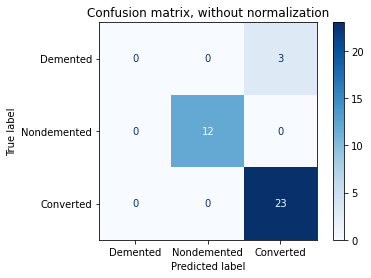

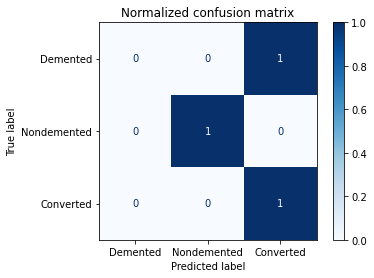

In [51]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [52]:
# Calculate classification report

from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.00      0.00      0.00         3
 Nondemented       1.00      1.00      1.00        12
   Converted       0.88      1.00      0.94        23

    accuracy                           0.92        38
   macro avg       0.63      0.67      0.65        38
weighted avg       0.85      0.92      0.88        38

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib

In [53]:
from sklearn import tree

In [54]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.868421052631579

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.8947368421052632
1.0


In [56]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4194517563645806, 'CDR'),
 (0.19529004083191703, 'MMSE'),
 (0.09391468514900429, 'nWBV'),
 (0.07121831802383831, 'Age'),
 (0.05792746837151669, 'ASF'),
 (0.0528987200609269, 'eTIV'),
 (0.04209204416424264, 'SES'),
 (0.03955458900626935, 'EDUC'),
 (0.01513338940221951, 'Female'),
 (0.012518988625484572, 'Male')]

In [57]:
# OVERSAMPLING

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [58]:
# define dataset
# X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

In [59]:
# summarize class distribution
# print(Counter(y))

In [60]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [61]:
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [62]:
# summarize class distribution
print(Counter(y_train_over))

Counter({'Demented': 52, 'Converted': 52, 'Nondemented': 49})


In [63]:
# PCA

# standardize data
from sklearn.preprocessing import StandardScaler 
X_train_std = StandardScaler().fit_transform(X_train_over)
X_train_std

array([[ 0.54, -0.85,  1.38, ..., -1.26, -1.26,  1.26],
       [ 1.76, -0.14, -0.32, ..., -0.29,  0.79, -0.79],
       [-1.09,  1.26, -1.17, ..., -1.09, -1.26,  1.26],
       ...,
       [ 0.4 ,  1.26, -1.17, ..., -1.04, -1.26,  1.26],
       [ 0.54,  1.97, -1.17, ..., -0.73, -1.26,  1.26],
       [ 0.27, -0.85,  0.53, ..., -0.08,  0.79, -0.79]])

In [64]:
X_test_std = StandardScaler().fit_transform(X_test)
X_test_std

array([[ 1.52, -1.35,  1.93,  0.31, -0.63,  1.37, -1.01, -1.31, -0.9 ,
         0.9 ],
       [-2.12,  1.  , -1.4 ,  0.7 , -0.63, -0.59,  2.17,  0.53,  1.11,
        -1.11],
       [ 0.26,  1.78, -1.4 , -1.99,  2.81,  1.01,  0.41, -1.04, -0.9 ,
         0.9 ],
       [-0.16,  1.  , -0.29,  0.31, -0.63, -0.28, -0.1 ,  0.16, -0.9 ,
         0.9 ],
       [ 2.08, -1.35,  0.82, -2.76,  1.09, -1.08, -1.65,  1.15, -0.9 ,
         0.9 ],
       [-1.28, -0.18, -0.29, -1.22,  1.09,  0.16, -0.37, -0.28, -0.9 ,
         0.9 ],
       [-0.86,  0.22, -0.29, -0.07, -0.63,  1.7 , -0.1 , -1.55, -0.9 ,
         0.9 ],
       [ 0.82,  1.  , -0.29,  0.31, -0.63, -0.24, -1.43,  0.13,  1.11,
        -1.11],
       [ 0.26,  0.22, -1.4 ,  0.31, -0.63,  1.54, -0.18, -1.44, -0.9 ,
         0.9 ],
       [-0.16,  1.  , -0.29,  0.7 , -0.63,  0.61, -1.62, -0.7 , -0.9 ,
         0.9 ],
       [ 0.82, -0.96, -0.29,  0.31, -0.63, -0.88, -0.1 ,  0.89,  1.11,
        -1.11],
       [ 1.24,  0.22, -0.29,  0.7 , -0.63, 

In [65]:
# use of Python library to directly compute Principal Components

from sklearn.decomposition import PCA
pca = PCA(n_components=2) 

In [66]:
principalComponents = pca.fit_transform(X_train_std) 
principalDf_X_train = pd.DataFrame(data = principalComponents , columns = ['principal component 1','principal component 2'])
principalDf_X_train.head(5)

,principal component 1,principal component 2
0,1.878563,0.781109
1,-0.629883,-1.177236
2,2.607068,-1.444830
3,2.809022,-0.506801
4,2.283095,0.208067


In [67]:
principalComponents = pca.fit_transform(X_test_std) 
principalDf_X_test = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf_X_test.head(5)

,principal component 1,principal component 2
0,2.259016,0.993329
1,-2.561717,-2.332277
2,2.430577,0.479806
3,0.624687,-0.801382
4,1.077577,4.058598


In [69]:
# visualize 2D Projection

fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Demented', 'Nondemented', 'Converted'] 
colors = ['r', 'g', 'b'] 

for target, color in zip(targets,colors): 
    indicesToKeep = principalDf_X_train['Group'] == target
    ax.scatter(principalDf_X_train.loc[indicesToKeep, 'principal component 1'] , principalDf_X_train.loc[indicesToKeep, 'principal component 2'] , marker='s', c = color , s = 50, alpha=.9) 
ax.legend(targets) 
ax.grid()

KeyError: 'Group'

In [70]:
# LOGISTIC REGRESSION 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [ ]:
# X_train_over, y_train_over

In [71]:
# Fit (train) or model using the training data

classifier.fit(principalDf_X_train, y_train_over)


LogisticRegression(max_iter=10000)

In [72]:
# Validate the model using the test data

print(f"Training Data Score: {classifier.score(principalDf_X_train, y_train_over)}")
print(f"Testing Data Score: {classifier.score(principalDf_X_test, y_test)}")

Training Data Score: 0.6601307189542484
Testing Data Score: 0.5526315789473685


In [73]:
# Make predictions

predictions = classifier.predict(principalDf_X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Demented' 'Nondemented' 'Demented' 'Converted' 'Demented' 'Demented'
 'Converted' 'Nondemented' 'Converted' 'Converted']
First 10 Actual labels: ['Nondemented', 'Nondemented', 'Demented', 'Nondemented', 'Demented', 'Demented', 'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented']


In [74]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Demented,Nondemented
1,Nondemented,Nondemented
2,Demented,Demented
3,Converted,Nondemented
4,Demented,Demented
5,Demented,Demented
6,Converted,Nondemented
7,Nondemented,Nondemented
8,Converted,Nondemented
9,Converted,Nondemented


In [75]:
targets

['Demented', 'Nondemented', 'Converted']

In [88]:
# SVM
# Support vector machine linear classifier

from sklearn.svm import SVC 
model = SVC(kernel='linear', probability=True)
model.fit(principalDf_X_train, y_train_over)

SVC(kernel='linear', probability=True)

In [89]:
# Model Accuracy

print('Test Accuracy: %.3f' % model.score(principalDf_X_test, y_test))

Test Accuracy: 0.605


In [90]:
# Calculate classification report

from sklearn.metrics import classification_report
predictions = model.predict(principalDf_X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.10      0.33      0.15         3
 Nondemented       0.73      0.92      0.81        12
   Converted       0.85      0.48      0.61        23

    accuracy                           0.61        38
   macro avg       0.56      0.58      0.53        38
weighted avg       0.75      0.61      0.64        38



In [93]:
from sklearn.metrics import roc_auc_score
roc = {label: [] for label in y_test.unique()}
#for label in y_test.unique():
#    model.fit(principalDf_X_train, train_class ==label)
#    predict_proba = model.predict_proba(principalDf_X_test)
#    roc[label] += roc_auc_score(y_test, predict_proba[:,1])
predict_proba = model.predict_proba(principalDf_X_test)
roc_auc_score(y_test, predict_proba, multi_class='ovr')
    

0.780114933375803

Confusion matrix, without normalization
[[ 1  0  2]
 [ 1 11  0]
 [ 8  4 11]]
Normalized confusion matrix
[[0.33 0.   0.67]
 [0.08 0.92 0.  ]
 [0.35 0.17 0.48]]


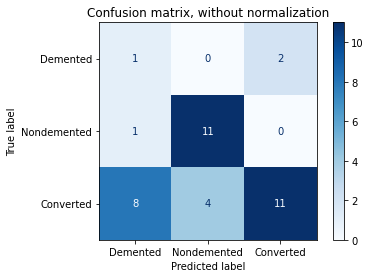

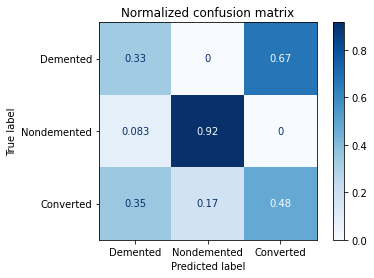

In [100]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, principalDf_X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [101]:
# Grid Search with SVM

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3, scoring="roc_auc_ovr")

In [102]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(principalDf_X_train, y_train_over)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             scoring='roc_auc_ovr', verbose=3)

In [103]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0005}


In [104]:
# List the best score
print(grid.best_score_)

0.8467917267917267


In [105]:
# Make predictions with the hypertuned model
predictions = grid.predict(principalDf_X_test)

In [107]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["Demented", "Nondemented", "Converted"]))

              precision    recall  f1-score   support

    Demented       0.10      0.33      0.15         3
 Nondemented       0.73      0.92      0.81        12
   Converted       0.85      0.48      0.61        23

    accuracy                           0.61        38
   macro avg       0.56      0.58      0.53        38
weighted avg       0.75      0.61      0.64        38



In [106]:
              precision    recall  f1-score   support

    Demented       0.10      0.33      0.15         3
 Nondemented       0.73      0.92      0.81        12
   Converted       0.85      0.48      0.61        23

    accuracy                           0.61        38
   macro avg       0.56      0.58      0.53        38
weighted avg       0.75      0.61      0.64        38


['Demented', 'Nondemented', 'Converted']